In [1]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
import numpy as np
import math

options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

x_min = np.zeros(6)
x_max = np.ones(6)
my_bounds = (x_min, x_max)


In [2]:
def endurance(args):
    x, y, z, u, v, w = args
    return - (math.exp(-2 * (y - math.sin(x)) ** 2) + math.sin(z * u) + math.cos(v * w))


def f(x):
    n_particles = x.shape[0]
    j = [endurance(x[i]) for i in range(n_particles)]
    return np.array(j)


In [3]:
optimizer = ps.single.GlobalBestPSO(
    n_particles=10, dimensions=6, options=options, bounds=my_bounds)

optimizer.optimize(f, iters=1000)


2023-03-27 12:30:30,563 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=-2.81
2023-03-27 12:30:32,285 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2.8116240254346385, best pos: [0.29707739 0.3531332  0.98503763 0.99774938 0.32938903 0.49325961]


(-2.8116240254346385,
 array([0.29707739, 0.3531332 , 0.98503763, 0.99774938, 0.32938903,
        0.49325961]))

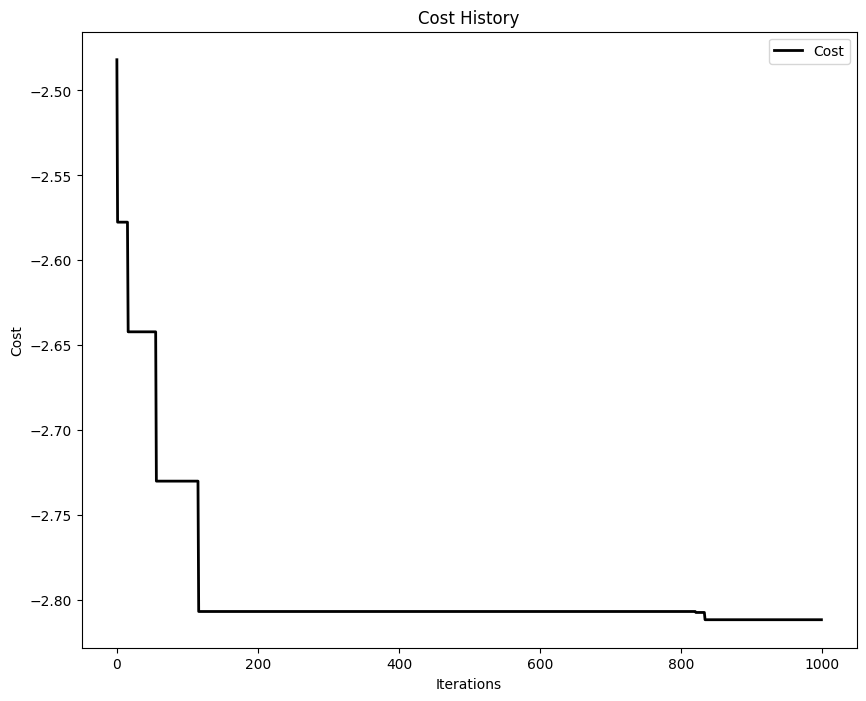

In [4]:
from pyswarms.utils.plotters import plot_cost_history
import matplotlib.pyplot as plt

cost_history = optimizer.cost_history

plot_cost_history(cost_history)
plt.show()
